In [19]:
from keras.datasets import boston_housing
from keras import models, layers

import numpy as np
import matplotlib.pyplot as plt 

from sklearn.preprocessing import StandardScaler


In [20]:
scaler = StandardScaler()

In [2]:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

In [21]:
scaler = scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
X_train.shape

(404, 13)

In [26]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [27]:
k = 4
num_val_samples = len(X_train)//k
num_epochs = 100
all_scores = []

In [30]:
for i in range(k):
    print ('processing fold #',i)
    val_data = X_train[i*num_val_samples : (i + 1) * num_val_samples]
    val_targets = y_train[i*num_val_samples : (i + 1) * num_val_samples]
    
    partial_X_train = np.concatenate(
    [X_train[: i * num_val_samples],
    X_train[(i +1) * num_val_samples:]], 
    axis = 0)
    
    partial_y_train = np.concatenate(
    [y_train[: i * num_val_samples],
    y_train[(i +1) * num_val_samples:]], 
    axis = 0)
    
    model = build_model()
    model.fit(partial_X_train, partial_y_train, epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [31]:
all_scores

[2.0995344230444126, 2.1967529825644916, 2.8715450220768997, 2.25148605238093]

In [32]:
np.mean(all_scores)

2.3548296200166834

In [33]:
num_epochs = 500
all_mae_histories = []

for i in range(k):
    print ('processing fold #',i)
    val_data = X_train[i*num_val_samples : (i + 1) * num_val_samples]
    val_targets = y_train[i*num_val_samples : (i + 1) * num_val_samples]
    
    partial_X_train = np.concatenate(
    [X_train[: i * num_val_samples],
    X_train[(i +1) * num_val_samples:]], 
    axis = 0)
    
    partial_y_train = np.concatenate(
    [y_train[: i * num_val_samples],
    y_train[(i +1) * num_val_samples:]], 
    axis = 0)
    
    model = build_model()
    history = model.fit(partial_X_train, partial_y_train,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history=history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [34]:
np.array(all_mae_histories).shape

(4, 500)

In [35]:
def smooth_curve(points, factor=.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous*factor + point * (1-factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

In [39]:
def plot_smoothed_mae(all_mae_history, ax):
    all_mae_history = np.array(all_mae_history)
    average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(all_mae_history.shape[1])]
    smooth_mae_history = smooth_curve(average_mae_history[10:])
    ax.plot(range(1,len(smooth_mae_history)+1), smooth_mae_history)
    ax.set_title('Smoothed Validation MAE')
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Validation MAE')

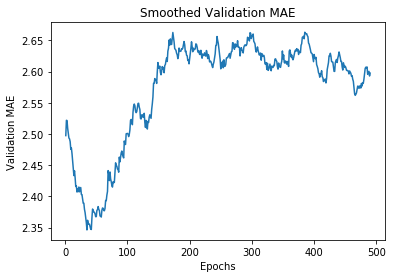

In [40]:
fig, ax = plt.subplots()
plot_smoothed_mae(all_mae_histories,ax)
plt.show()

In [41]:
model = build_model()
model.fit(X_train, y_train, epochs=50, batch_size=1)
test_mse, test_mae = model.evaluate(X_test, y_test)

Epoch 1/50
404/404 [==============================] - 1s 2ms/step - loss: 147.2487 - mean_absolute_error: 8.8028
Epoch 2/50
404/404 [==============================] - 0s 761us/step - loss: 25.3936 - mean_absolute_error: 3.5884
Epoch 3/50
404/404 [==============================] - 0s 763us/step - loss: 19.0843 - mean_absolute_error: 2.9665
Epoch 4/50
404/404 [==============================] - 0s 755us/step - loss: 15.5492 - mean_absolute_error: 2.6613
Epoch 5/50
404/404 [==============================] - 0s 809us/step - loss: 13.7755 - mean_absolute_error: 2.4348
Epoch 6/50
404/404 [==============================] - 0s 788us/step - loss: 12.3156 - mean_absolute_error: 2.4283
Epoch 7/50
404/404 [==============================] - 0s 806us/step - loss: 11.4438 - mean_absolute_error: 2.2875
Epoch 8/50
404/404 [==============================] - 0s 794us/step - loss: 10.6234 - mean_absolute_error: 2.2182
Epoch 9/50
404/404 [==============================] - 0s 762us/step - loss: 10.1737 - mea

In [42]:
test_mae

2.376933340932809

In [43]:
test_mse

15.711417254279642